In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy.stats import sem
# Set the font to Times New Roman globally
rcParams['font.family'] = 'Times New Roman'

In [25]:

# file_path = "../experiment_configs_time_llm_training/seed_238822_model_GPT2_dim_768_seq_6_context_6_pred_9_patch_6_epochs_20/patient_584/logs/logs_2025-02-28_03-42-41/inference_results_reformatted.csv"

# Load your CSV file; adjust the file path as needed.
# df = pd.read_csv(file_path)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mae_steps(df, title, file_path):  
    # Identify the true and predicted columns
    true_cols = [col for col in df.columns if "true" in col]
    pred_cols = [col for col in df.columns if "pred" in col]

    # Compute absolute errors for each future timestep and store metrics
    error_data = {}
    mean_errors = []
    std_devs = []

    for i, (true_col, pred_col) in enumerate(zip(true_cols, pred_cols)):
        # Absolute errors per timestep
        abs_error = np.abs(df[true_col] - df[pred_col])
        error_data[f"Future_Timestep_t{i+1}"] = abs_error

        # Compute mean and standard deviation
        mean_errors.append(abs_error.mean())
        std_devs.append(abs_error.std())

    # Prepare data for visualization
    future_timesteps = np.arange(1, len(mean_errors) + 1)

    # --- Enhanced Line Plot with SD Range ---
    plt.figure(figsize=(10, 6))

    # Plot Mean Absolute Error
    plt.plot(
        future_timesteps,
        mean_errors,
        marker="o",
        label="Mean Absolute Error",
        color="blue",
    )

    # Add shaded region for ±1 SD
    lower_bound = np.array(mean_errors) - np.array(std_devs)
    upper_bound = np.array(mean_errors) + np.array(std_devs)
    plt.fill_between(
        future_timesteps,
        lower_bound,
        upper_bound,
        color="blue",
        alpha=0.2,
        label="±1 SD",
    )

    # Additional plot settings
    plt.title(title, fontsize=14)
    plt.xlabel("Future Timestep $t_k$", fontsize=12)
    plt.ylabel("Mean Absolute Error (mg/dL)", fontsize=12)
    plt.xticks(ticks=future_timesteps)
    plt.legend()
    plt.grid(True, alpha=0.5)

    # Save figures
    plt.savefig(file_path.replace('.csv', '.svg'), format='svg')
    plt.savefig(file_path.replace('.csv', '.png'), format='png')

    plt.show()


In [27]:
def plot_mae_box_plot(df):
    true_cols = [col for col in df.columns if "true" in col]
    pred_cols = [col for col in df.columns if "pred" in col]

    # Compute absolute errors for each prediction order and store metrics
    error_data = {}
    mean_errors = []
    std_devs = []

    for i, (true_col, pred_col) in enumerate(zip(true_cols, pred_cols)):
        # Absolute errors per prediction order
        abs_error = np.abs(df[true_col] - df[pred_col])
        error_data[f"Prediction_Order_{i+1}"] = abs_error

        # Compute mean and standard deviation
        mean_errors.append(abs_error.mean())
        std_devs.append(abs_error.std())

    # Prepare data for visualization
    # --- Boxplot: Distribution of Absolute Errors (MAE) by Prediction Order ---
    error_melted = pd.DataFrame(error_data).melt(var_name="Prediction_Order", value_name="Absolute_Error")
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Prediction_Order", y="Absolute_Error", data=error_melted)
    plt.title("Distribution of Absolute Errors by Prediction Order")
    plt.xlabel("Prediction Order (1 = most recent prediction)")
    plt.ylabel("Absolute Error")
    plt.show()

In [28]:
# plot_mae_steps(df,title="MAE of BG Predictions at Future Timesteps (Patient 584, Fine-Tuned TimeLLM)",file_path=file_path)

In [29]:
file_path = "../experiment_configs_chronos_training_inference/seed_238822_model_amazon-chronos-t5-base_dtype_float32_mode_inference_context_6_pred_9/patient_584/logs/logs_2025-03-09_12-54-32/final_results.csv"
df_chronos=pd.read_csv(file_path)
df_chronos.head()

,t_6_true,t_6_pred,t_7_true,t_7_pred,t_8_true,t_8_pred,t_9_true,t_9_pred,t_10_true,t_10_pred,t_11_true,t_11_pred,t_12_true,t_12_pred,t_13_true,t_13_pred,t_14_true,t_14_pred
0,258.0,248.58629,267.0,254.27910,275.0,258.07430,284.0,244.79106,295.0,240.99585,299.0,240.99585,300.0,254.27910,309.0,263.76712,312.0,261.86950
1,267.0,258.65103,275.0,258.65103,284.0,260.56696,295.0,258.65103,299.0,254.81917,300.0,254.81917,309.0,258.65103,312.0,260.56696,313.0,258.65103
2,275.0,270.62558,284.0,268.69257,295.0,276.42470,299.0,297.68817,300.0,280.29080,309.0,288.02298,312.0,274.49167,313.0,278.35780,312.0,282.22385
3,284.0,270.90054,295.0,267.00270,299.0,268.95163,300.0,276.74730,309.0,253.36021,312.0,247.51346,313.0,251.41130,312.0,259.20700,311.0,259.20700
4,295.0,293.12076,299.0,265.57920,300.0,251.80841,309.0,263.61194,312.0,300.98975,313.0,295.08798,312.0,287.21900,311.0,289.18625,314.0,285.25174


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

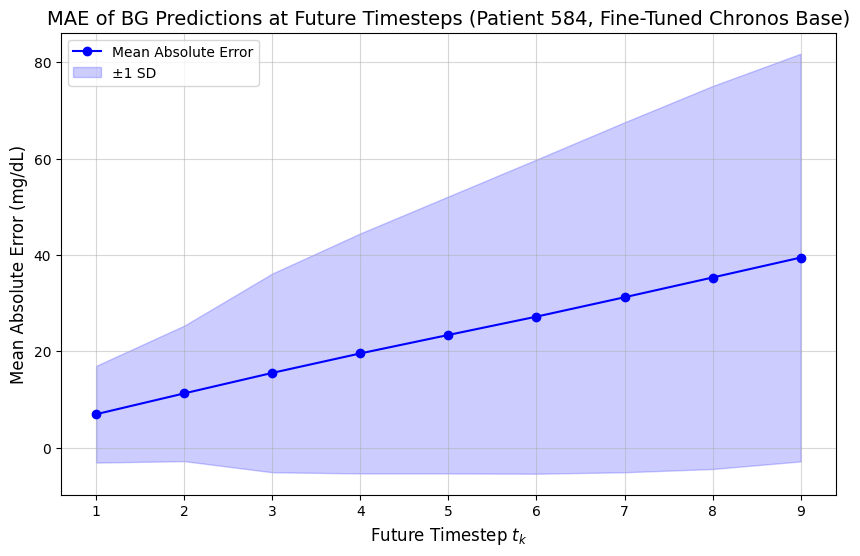

In [30]:
plot_mae_steps(df_chronos,title="MAE of BG Predictions at Future Timesteps (Patient 584, Fine-Tuned Chronos Base)",file_path=file_path)